# Experiments Results: Decomposition of Adasecant.

### Context:
Handwriting experiment of Alex Graves.
Only 1 GRU layer of size 400 with Graves' attention mechanism.

In [1]:
from matplotlib import pyplot
%matplotlib inline
import cPickle
import os
from utils import save_dir
from blocks.serialization import load
import numpy
from pandas import DataFrame
from pylab import rcParams
import seaborn
seaborn.set_style("darkgrid")
rcParams['figure.figsize'] = 15,5

/Tmp/lisa/os_v5/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Tmp/lisa/os_v5/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Look for all experiments and filter to only consider the ones run for this paper.

In [2]:
from os import walk

for (dirpath, dirnames, filenames) in os.walk(os.path.join(save_dir, 'config')):
    experiments = sorted([exp_.replace('.pkl', '') for exp_ in filenames])
    break
experiments = [x_ for x_ in experiments if ('18533' in x_ or '18534' in x_) and 'b' not in x_]

Define function to plot experiments. Note that there are some upper and lower limits. Everything outside is consider instability and will be deleted. 

In [3]:
def plot_comparison(exp_dict, channels, name_channels, upper_limit = 2, lower_limit = -2):
    exp_names = exp_dict.keys()
    exp_codes = [exp_dict[name_] for name_ in exp_names]

    num_plots = len(channels)
    all_channels = list(set([x for small in channels for x in small]))

    logs = {}

    for exp_code in exp_codes:
        with open(os.path.join(save_dir, "pkl", "best_" + exp_code + ".tar"), 'rb') as src:
           log = load(src, "log")
           print exp_code + ": " + str(log.current_row['valid_nll'])

        with open(os.path.join(save_dir, "pkl", "last_" + exp_code + ".tar"), 'rb') as src:
           logs[exp_code] = load(src, "log")

    f, axarr = pyplot.subplots(1, num_plots, sharey=True)

    for exp in exp_codes:
        log = logs[exp]
        df = DataFrame.from_dict(log, orient='index')
        df = df[[c_ for c_ in all_channels if c_ in df.columns]].astype(float)
        df = df.interpolate('index')
        df[df > upper_limit] = numpy.nan
        df[df < lower_limit] = numpy.nan
        df = df[df.index<= 60000]
        df[df.index<= 1000] = numpy.nan
        
        print "Min for: ", exp
        print df.min()

        for i, channel in enumerate(channels):
            to_plot = [c_ for c_ in channel if c_ in df.columns]
            if to_plot:
                df[to_plot].plot(ax=axarr[i])

    for i, channel in enumerate(name_channels):
        lines, labels = axarr[i].get_legend_handles_labels()
        axarr[i].legend(lines, exp_names, loc='best')
        axarr[i].set_title(channel)
        
channels = [['train_nll'], ['valid_nll']]
name_channels = ['Train NLL', 'Valid  NLL']

### Adam (with different learning rates) VS Adasecant
Comments: If the learning rate is tuned extensively, Adam competes with Adasecant

18534_2: -1.67529773712
18534_3: -1.7390037775
18533_1: -1.70787978172
18533_4: -1.71341204643
Min for:  18534_2
train_nll   -1.663749
valid_nll   -1.629764
dtype: float64
Min for:  18534_3
train_nll   -1.845535
valid_nll   -1.739004
dtype: float64
Min for:  18533_1
train_nll   -1.770426
valid_nll   -1.707880
dtype: float64
Min for:  18533_4
train_nll   -1.838955
valid_nll   -1.713412
dtype: float64


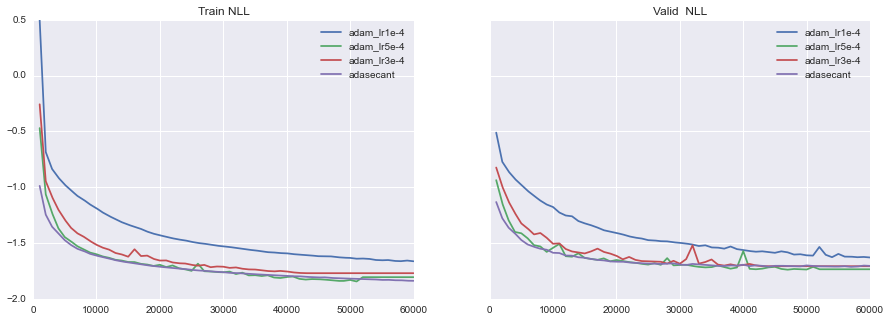

In [4]:
exp_dict = {
    'adam_lr3e-4':'18533_1',
    'adam_lr1e-4': '18534_2',
    'adam_lr5e-4': '18534_3',
    'adasecant': '18533_4'
}
plot_comparison(exp_dict, channels, name_channels)

### Adasecant removing each of the components
Comments: Block normalization seems to matter more than AG and VR. OD makes everything worse and more noisy. Maybe there's an error with how I deactivated it?

18533_5: -1.71267604828
18533_6: -1.71094286442
18534_8: -1.69228458405
18533_7: -1.74638557434
18533_4: -1.71341204643
Min for:  18533_5
train_nll   -1.843954
valid_nll   -1.712676
dtype: float64
Min for:  18533_6
train_nll   -1.825658
valid_nll   -1.710943
dtype: float64
Min for:  18534_8
train_nll   -1.676659
valid_nll   -1.652054
dtype: float64
Min for:  18533_7
train_nll   -1.773256
valid_nll   -1.729704
dtype: float64
Min for:  18533_4
train_nll   -1.838955
valid_nll   -1.713412
dtype: float64


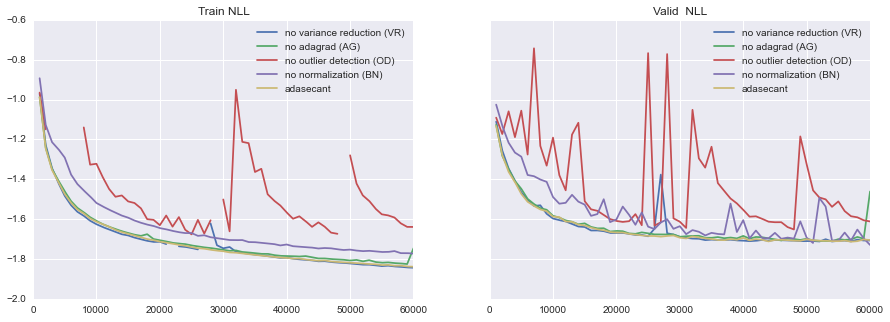

In [5]:
exp_dict = {
    'adasecant': '18533_4',
    'no variance reduction (VR)': '18533_5',
    'no adagrad (AG)': '18533_6',
    'no normalization (BN)': '18533_7',
    'no outlier detection (OD)': '18534_8'
}
plot_comparison(exp_dict, channels, name_channels)

### Adasecant without Variance Reduction
Comments: Variance reduction causes a bit of instabilites, that you can see as the parts missing of the curve. Especially with combined with no outlier detection.

18533_5: -1.71267604828
18534_11: -1.40291762352
18534_10: -1.73749661446
18534_9: -1.71639919281
18533_4: -1.71341204643
Min for:  18533_5
train_nll   -1.843954
valid_nll   -1.712676
dtype: float64
Min for:  18534_11
train_nll   -1.356414
valid_nll   -1.401532
dtype: float64
Min for:  18534_10
train_nll   -1.767563
valid_nll   -1.719144
dtype: float64
Min for:  18534_9
train_nll   -1.820081
valid_nll   -1.716399
dtype: float64
Min for:  18533_4
train_nll   -1.838955
valid_nll   -1.713412
dtype: float64


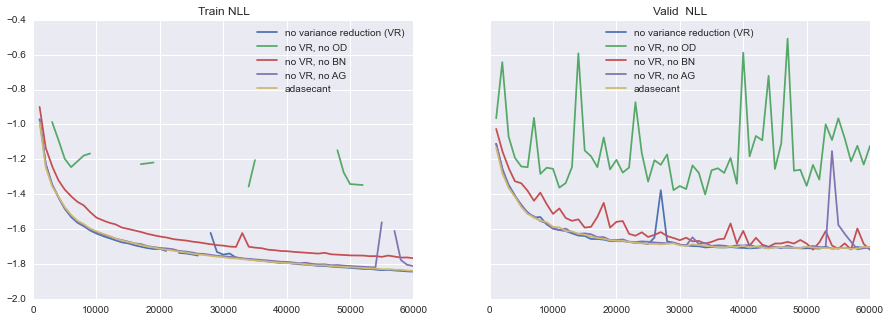

In [6]:
exp_dict = {
    'adasecant': '18533_4',
    'no variance reduction (VR)': '18533_5',
    'no VR, no AG': '18534_9',
    'no VR, no BN': '18534_10',
    'no VR, no OD': '18534_11',
}
plot_comparison(exp_dict, channels, name_channels)

### Adasecant without using Adagrad
Comments: Adagrad seems to be the component that impacts the less the performance.

18533_6: -1.71094286442
18534_13: -1.63693594933
18534_12: -1.75214612484
18534_9: -1.71639919281
18533_4: -1.71341204643
Min for:  18533_6
train_nll   -1.825658
valid_nll   -1.710943
dtype: float64
Min for:  18534_13
train_nll   -1.651005
valid_nll   -1.636936
dtype: float64
Min for:  18534_12
train_nll   -1.801284
valid_nll   -1.737716
dtype: float64
Min for:  18534_9
train_nll   -1.820081
valid_nll   -1.716399
dtype: float64
Min for:  18533_4
train_nll   -1.838955
valid_nll   -1.713412
dtype: float64


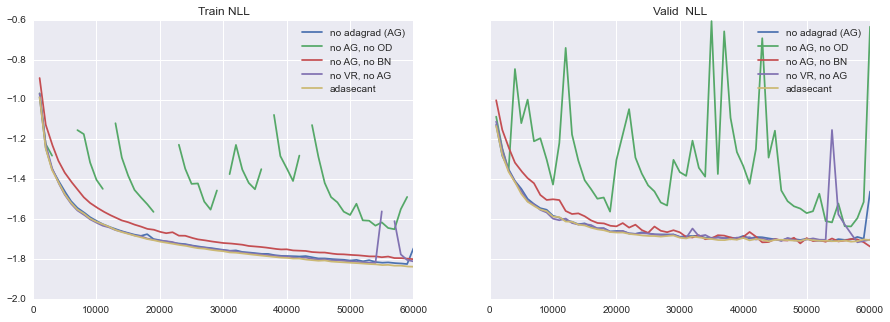

In [7]:
exp_dict = {
    'adasecant': '18533_4',
    'no adagrad (AG)': '18533_6',
    'no VR, no AG': '18534_9',
    'no AG, no BN': '18534_12',
    'no AG, no OD': '18534_13'
}
plot_comparison(exp_dict, channels, name_channels)

### Adasecant with no Block Normalization
Comments: Block Normalization seems to provide a small but constant improvement over the version without it.

18534_14: -1.72158205509
18534_12: -1.75214612484
18534_10: -1.73749661446
18533_7: -1.74638557434
18533_4: -1.71341204643
Min for:  18534_14
train_nll   -1.678646
valid_nll   -1.664006
dtype: float64
Min for:  18534_12
train_nll   -1.801284
valid_nll   -1.737716
dtype: float64
Min for:  18534_10
train_nll   -1.767563
valid_nll   -1.719144
dtype: float64
Min for:  18533_7
train_nll   -1.773256
valid_nll   -1.729704
dtype: float64
Min for:  18533_4
train_nll   -1.838955
valid_nll   -1.713412
dtype: float64


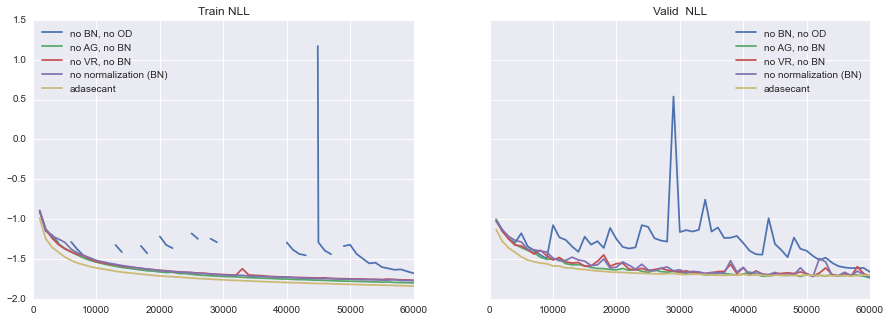

In [8]:
exp_dict = {
    'adasecant': '18533_4',
    'no normalization (BN)': '18533_7',
    'no VR, no BN': '18534_10',
    'no AG, no BN': '18534_12',
    'no BN, no OD': '18534_14',
}
plot_comparison(exp_dict, channels, name_channels)

### Adasecant without Outlier Detection
Comments: Could someone check my mods for outlier detection? Maybe I did something wrong because taking this component away seems to create SUPER noisy curves.

18534_13: -1.63693594933
18534_8: -1.69228458405
18534_11: -1.40291762352
18534_14: -1.72158205509
18533_4: -1.71341204643
Min for:  18534_13
train_nll   -1.651005
valid_nll   -1.636936
dtype: float64
Min for:  18534_8
train_nll   -1.676659
valid_nll   -1.652054
dtype: float64
Min for:  18534_11
train_nll   -1.356414
valid_nll   -1.401532
dtype: float64
Min for:  18534_14
train_nll   -1.678646
valid_nll   -1.664006
dtype: float64
Min for:  18533_4
train_nll   -1.838955
valid_nll   -1.713412
dtype: float64


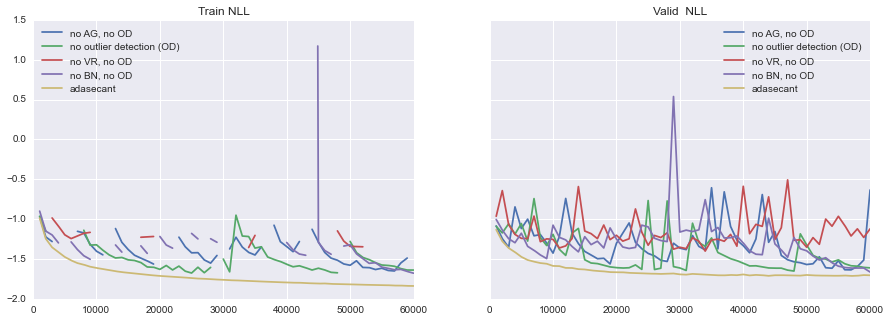

In [9]:
exp_dict = {
    'adasecant': '18533_4',
    'no outlier detection (OD)': '18534_8',
    'no VR, no OD': '18534_11',
    'no AG, no OD': '18534_13',
    'no BN, no OD': '18534_14'
}
plot_comparison(exp_dict, channels, name_channels)

### Adasecant with only 1 of the components
Comments: Removing everything but outlier detection seems to work reasonably good. It's funny that some of the instabilites of only removing VR are not present when you remove BN and AG as well.

18534_18: -1.72065520287
18534_17: -270209.9375
18534_16: -1.45299434662
18534_15: -1.53240215778
18533_4: -1.71341204643
Min for:  18534_18
train_nll   -1.788777
valid_nll   -1.708572
dtype: float64
Min for:  18534_17
train_nll   NaN
valid_nll   NaN
dtype: float64
Min for:  18534_16
train_nll   -1.456187
valid_nll   -1.452994
dtype: float64
Min for:  18534_15
train_nll   -1.520846
valid_nll   -1.514920
dtype: float64
Min for:  18533_4
train_nll   -1.838955
valid_nll   -1.713412
dtype: float64


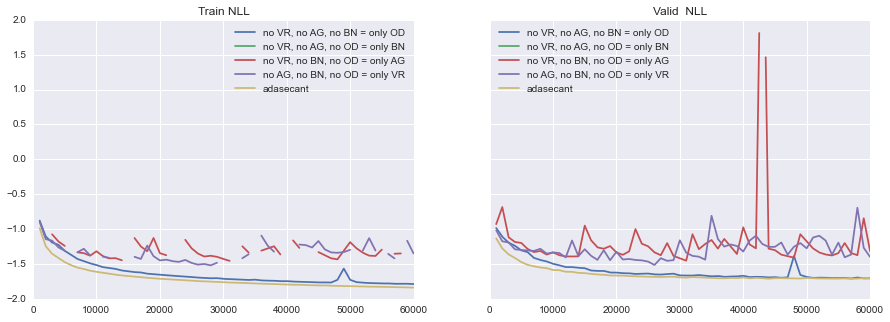

In [10]:
exp_dict = {
    'adasecant': '18533_4',
    'no AG, no BN, no OD = only VR': '18534_15',
    'no VR, no BN, no OD = only AG': '18534_16',
    'no VR, no AG, no OD = only BN': '18534_17',
    'no VR, no AG, no BN = only OD': '18534_18',
}
plot_comparison(exp_dict, channels, name_channels)

### Adasecant with NOTHING
Comment: Failed experiment?

18534_19: -685497408.0
18533_4: -1.71341204643
Min for:  18534_19
train_nll   -1.242372
valid_nll   -1.320920
dtype: float64
Min for:  18533_4
train_nll   -1.838955
valid_nll   -1.713412
dtype: float64


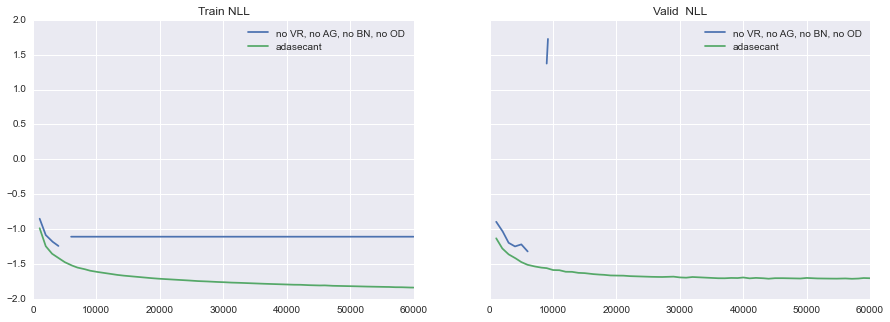

In [11]:
exp_dict = {
    'adasecant': '18533_4',
    'no VR, no AG, no BN, no OD': '18534_19',
}
plot_comparison(exp_dict, channels, name_channels)

### End of experiments. Ignore what follows.

#### Experiment dictionary...
Save for if necessary

In [12]:
exp_dict = {
    'adam_lr3e-4':'18533_1',
    'adam_lr1e-4': '18534_2',
    'adam_lr5e-4': '18534_3',
    'adasecant': '18533_4',
    'no variance reduction (VR)': '18533_5',
    'no adagrad (AG)': '18533_6',
    'no normalization (BN)': '18533_7',
    'no outlier detection (OD)': '18534_8',
    'no VR, no AG': '18534_9',
    'no VR, no BN': '18534_10',
    'no VR, no OD': '18534_11',
    'no AG, no BN': '18534_12',
    'no AG, no OD': '18534_13',
    'no BN, no OD': '18534_14',
    'no AG, no BN, no OD = only VR': '18534_15',
    'no VR, no BN, no OD = only AG': '18534_16',
    'no VR, no AG, no OD = only BN': '18534_17',
    'no VR, no AG, no BN = only OD': '18534_18',
    'no VR, no AG, no BN, no OD': '18534_19',
}